In [1]:
import pyathena as pa
import pandas as pd

In [5]:
conn = pa.connect(
    s3_staging_dir = 's3://prosodies-silver',
    region_name = 'us-east-1',
    work_group='primary'
)

In [63]:
fulldf = pd.read_sql("select * from text.prosodies_gold", conn)

/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [70]:
fulldf = fulldf.head(6)

In [71]:
df = fulldf[["11","100","001","10","01"]]


In [72]:
df

,11,100,001,10,01
0,0.076504,0.013204,0.014789,0.104660,0.110064
1,0.100615,0.047938,0.044438,0.170324,0.163451
2,0.087106,0.045607,0.042170,0.169517,0.162140
3,0.103791,0.053094,0.049669,0.176068,0.170587
4,0.150860,0.041617,0.037615,0.163665,0.156062
5,0.139763,0.032686,0.030020,0.145964,0.139113


In [73]:
title = fulldf[["title"]]
title_list = [item for sublist in title.values.tolist() for item in sublist]
title_list

['AChildsGardenOfVerses',
 'DeclarationOfIndependence',
 'TheConstitutionOfTheUnitedStatesOfAmerica',
 'LincolnsFirstInauguralAddress',
 'GiveMeLibertyOrGiveMeDeath',
 'TheTragedyOfPuddnheadWilson']

In [14]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [74]:
# X = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1], [0, 1, 0], [0, 1, 1]])
X = df.to_numpy()
mds = MDS(random_state=0)
X_transform = mds.fit_transform(X)
print(X_transform)


[[-0.01742934  0.07839299]
 [-0.01372133 -0.02475767]
 [-0.02634588 -0.01915945]
 [-0.00779041 -0.03516583]
 [ 0.03931428 -0.01322951]
 [ 0.02597269  0.01391948]]


In [75]:
dist_manhattan = manhattan_distances(X)
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)

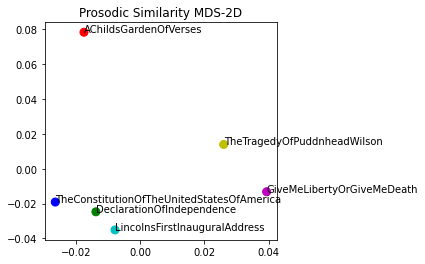

In [77]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']
size = [64, 64, 64, 64, 64, 64]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Prosodic Similarity MDS-2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
for i, title in enumerate(title_list):
    ax.annotate(title, (X_transform[:,0][i], X_transform[:,1][i]))

plt.show()

In [ ]:
# "A Child's Garden of Verses" is metered poetry, which would explain its unique position in the plot.

# "The Tragedy of Pudd'nhead Wilson" is fiction, 
# whereas the other texts in the lower half of the plot are nonfiction.
# An interesting proposition would be that works of fiction have a 
# distinctly different prosodic profile than works of nonfiction.